# **Library**

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from scipy.stats import pearsonr

In [2]:
#Import csv from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data**

In [3]:
#Show the Data
df = pd.read_csv('/content/drive/MyDrive/Transjakarta.csv')
display(df.head(),df.tail())

transID         payCardID payCardBank      payCardName payCardSex  \
0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   

   payCardBirthDate corridorID                              corridorName  \
0              2008          5                     Matraman Baru - Ancol   
1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2              1992        R1A                        Pantai Maju - Kota   
3              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
4              1982         12                     Tanjung Priok - Pluit   

   direction tapInStops  ... tapInStopsLon  stopStartSeq            tapInTime  \
0        1.0     P00142  ...     106.84402             7  2023-04-03 05:21:44   
1        0.0    B01963P  ...     106.83302            13  2023-04-03 05:42:44   
2        0.0    B00499P  ...     106.81435            38  2023-04-03 05:59:06   
3        0.0    B05587P  ...     106.93526            23  2023-04-03 05:44:51   
4        0.0     P00239  ...     106.88900             5  2023-04-03 06:17:35   

   tapOutStops        tapOutStopsName tapOutStopsLat tapOutStopsLon  \
0       P00253                Tegalan      -6.203101      106.85715   
1      B03307P    Sampoerna Strategic      -6.217152      106.81892   
2      B04962P  Simpang Kunir Kemukus      -6.133731      106.81475   
3      B03090P      Raya Penggilingan      -6.183068      106.93194   
4       P00098       Kali Besar Barat      -6.135355      106.81143   

   stopEndSeq           tapOutTime  payAmount  
0        12.0  2023-04-03 06:00:53     3500.0  
1        21.0  2023-04-03 06:40:01     3500.0  
2        39.0  2023-04-03 06:50:55     3500.0  
3        29.0  2023-04-03 06:28:16     3500.0  
4        15.0  2023-04-03 06:57:03     3500.0  

[5 rows x 22 columns]

transID            payCardID payCardBank  \
37895  ZWEC949B8Q87QG  4685818286724028395      brizzi   
37896  YHHK837P6Y95GN     6502902290603767         dki   
37897  YXPP627N4G95HO      213159426675861      emoney   
37898  RGVK175U2U98UV      377840859133591      emoney   
37899  FMZZ963S4B68ZP         501862539795       flazz   

                  payCardName payCardSex  payCardBirthDate corridorID  \
37895         Kamila Mahendra          F              2004         6B   
37896            Titi Siregar          M              1974         9N   
37897  drg. Zahra Nashiruddin          F              1976         1T   
37898            Ana Agustina          M              1976     JAK.13   
37899       drg. Leo Najmudin          F              1985         13   

                            corridorName  direction tapInStops  ...  \
37895  Ragunan - MH Thamrin via Semanggi        1.0     P00261  ...   
37896             Pinang Ranti - Pramuka        1.0     P00064  ...   
37897               Cibubur - Balai Kota        1.0    B02873P  ...   
37898        Tanah Abang - Jembatan Lima        1.0    B02505P  ...   
37899                  Ciledug - Tendean        0.0     P00001  ...   

      tapInStopsLon  stopStartSeq            tapInTime  tapOutStops  \
37895     106.82309             2  2023-04-21 18:18:37       P00228   
37896     106.88116             1  2023-04-18 21:52:31       P00179   
37897     106.81676            12  2023-04-04 10:29:47      B00226P   
37898     106.80954            33  2023-04-15 19:59:26      B01787P   
37899     106.74786             2  2023-04-12 21:08:12       P00106   

       tapOutStopsName tapOutStopsLat tapOutStopsLon  stopEndSeq  \
37895           SMK 57      -6.290967      106.82365        13.0   
37896     Pinang Ranti      -6.291075      106.88634         2.0   
37897  Buperta Cibubur      -6.370321      106.89628        14.0   
37898       JPO Blok G      -6.188861      106.81135        34.0   
37899   Kebayoran Lama      -6.238340      106.77752         7.0   

                tapOutTime  payAmount  
37895  2023-04-21 19:55:49     3500.0  
37896  2023-04-18 22:28:22     3500.0  
37897  2023-04-04 13:27:25    20000.0  
37898  2023-04-15 20:27:50        0.0  
37899  2023-04-12 21:34:53     3500.0  

[5 rows x 22 columns]

# **Data Cleaning**

In [4]:
# DATA CLEANING AND EXPLORATORY CHECKS

import pandas as pd
import numpy as np

#Basic info and missing values
print("=== Dataset Info ===")
df.info()

print("\n=== Missing Values per Column ===")
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df) * 100).round(2)
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percent %': missing_percent})
display(missing_summary)

#Handle missing payAmount (fill with 0)
df['payAmount'] = df['payAmount'].fillna(0)

#Check for duplicates
print("\n=== Duplicate Transactions ===")
duplicate_count = df.duplicated(subset=['transID']).sum()
print(f"Duplicate transID rows: {duplicate_count}")
df = df.drop_duplicates(subset=['transID'])

#Check data types and convert datetime
print("\n=== Data Types Before Conversion ===")
display(df.dtypes)

df['tapInTime'] = pd.to_datetime(df['tapInTime'], errors='coerce')
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], errors='coerce')

print("\n=== Data Types After Conversion ===")
display(df.dtypes)

#Compute trip duration in minutes
df['tripDurationMin'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

# Filter out negative or zero durations
df = df[df['tripDurationMin'] > 0]

#Outlier Detection (numerical columns)
numeric_cols = ['payAmount', 'tripDurationMin']
print("\n=== Outlier Detection ===")
for col in numeric_cols:
    if col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        print(f"{col}: {len(outliers)} outliers")
        # Optionally cap outliers
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])

#Check for inconsistent categorical values
categorical_cols = ['payCardSex', 'direction', 'corridorName', 'tapInStopsName', 'tapOutStopsName']
for col in categorical_cols:
    print(f"\nUnique values in {col}: {df[col].unique()}")

#Summary after cleaning
print("\n=== Cleaned Dataset Info ===")
df.info()
display(df.head())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   3

Missing Values  Percent %
tapOutStops                 2289       6.04
corridorName                1930       5.09
tapOutStopsLat              1344       3.55
stopEndSeq                  1344       3.55
tapOutTime                  1344       3.55
tapOutStopsLon              1344       3.55
tapOutStopsName             1344       3.55
corridorID                  1257       3.32
tapInStops                  1213       3.20
payAmount                   1007       2.66
payCardID                      0       0.00
transID                        0       0.00
payCardName                    0       0.00
payCardBank                    0       0.00
payCardBirthDate               0       0.00
payCardSex                     0       0.00
stopStartSeq                   0       0.00
tapInStopsName                 0       0.00
direction                      0       0.00
tapInStopsLon                  0       0.00
tapInStopsLat                  0       0.00
tapInTime                      0       0.00


=== Duplicate Transactions ===
Duplicate transID rows: 0

=== Data Types Before Conversion ===


transID              object
payCardID             int64
payCardBank          object
payCardName          object
payCardSex           object
payCardBirthDate      int64
corridorID           object
corridorName         object
direction           float64
tapInStops           object
tapInStopsName       object
tapInStopsLat       float64
tapInStopsLon       float64
stopStartSeq          int64
tapInTime            object
tapOutStops          object
tapOutStopsName      object
tapOutStopsLat      float64
tapOutStopsLon      float64
stopEndSeq          float64
tapOutTime           object
payAmount           float64
dtype: object


=== Data Types After Conversion ===


transID                     object
payCardID                    int64
payCardBank                 object
payCardName                 object
payCardSex                  object
payCardBirthDate             int64
corridorID                  object
corridorName                object
direction                  float64
tapInStops                  object
tapInStopsName              object
tapInStopsLat              float64
tapInStopsLon              float64
stopStartSeq                 int64
tapInTime           datetime64[ns]
tapOutStops                 object
tapOutStopsName             object
tapOutStopsLat             float64
tapOutStopsLon             float64
stopEndSeq                 float64
tapOutTime          datetime64[ns]
payAmount                  float64
dtype: object


=== Outlier Detection ===
payAmount: 1687 outliers
tripDurationMin: 39 outliers

Unique values in payCardSex: ['M' 'F']

Unique values in direction: [1. 0.]

Unique values in corridorName: ['Matraman Baru - Ancol' 'Stasiun Tebet - Karet via Patra Kuningan'
 'Pantai Maju - Kota' 'Pulo Gebang - Pulo Gadung 2 via PIK'
 'Tanjung Priok - Pluit' 'Cibubur - Balai Kota' nan
 'Bekasi Barat - Kuningan' 'Rempoa - Blok M'
 'Kampung Melayu - Tanah Abang via Cikini' 'BKN - Blok M'
 'PGC 2 - Grogol 2' 'Pulo Gadung 2 - Tosari' 'Pasar Minggu - Jagakarsa'
 'Ciputat - Kampung Rambutan' 'Ciledug - Tendean'
 'Kebayoran Lama - Jelambar' 'Pinang Ranti - Pluit'
 'Terminal Tanjung Priok - Ancol Barat' 'Poris Plawad - Bundaran Senayan'
 'Cililitan - Condet' 'Ragunan - Gelora Bung Karno'
 'Kampung Melayu - Pulo Gebang via BKT' 'Kampung Melayu - Duren Sawit'
 'Pulo Gebang - Matraman' 'Pesanggrahan - Blok M'
 'Rusun Flamboyan - Cengkareng' 'Blok M - Kota'
 'Kampung Rambutan - Ragunan' 'Senen - Blok M'
 'Pancoran 

transID         payCardID payCardBank      payCardName payCardSex  \
0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   

   payCardBirthDate corridorID                              corridorName  \
0              2008          5                     Matraman Baru - Ancol   
1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2              1992        R1A                        Pantai Maju - Kota   
3              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
4              1982         12                     Tanjung Priok - Pluit   

   direction tapInStops  ... stopStartSeq           tapInTime  tapOutStops  \
0        1.0     P00142  ...            7 2023-04-03 05:21:44       P00253   
1        0.0    B01963P  ...           13 2023-04-03 05:42:44      B03307P   
2        0.0    B00499P  ...           38 2023-04-03 05:59:06      B04962P   
3        0.0    B05587P  ...           23 2023-04-03 05:44:51      B03090P   
4        0.0     P00239  ...            5 2023-04-03 06:17:35       P00098   

         tapOutStopsName tapOutStopsLat tapOutStopsLon stopEndSeq  \
0                Tegalan      -6.203101      106.85715       12.0   
1    Sampoerna Strategic      -6.217152      106.81892       21.0   
2  Simpang Kunir Kemukus      -6.133731      106.81475       39.0   
3      Raya Penggilingan      -6.183068      106.93194       29.0   
4       Kali Besar Barat      -6.135355      106.81143       15.0   

           tapOutTime  payAmount  tripDurationMin  
0 2023-04-03 06:00:53     3500.0        39.150000  
1 2023-04-03 06:40:01     3500.0        57.283333  
2 2023-04-03 06:50:55     3500.0        51.816667  
3 2023-04-03 06:28:16     3500.0        43.416667  
4 2023-04-03 06:57:03     3500.0        39.466667  

[5 rows x 23 columns]

# **Handling Missing Values**

In [17]:
import pandas as pd
import numpy as np

# Handle corridor fields using whichever value is available
if 'corridorID' in df.columns and 'corridorName' in df.columns:
    df['corridorID'] = df['corridorID'].fillna(df['corridorName'])
    df['corridorName'] = df['corridorName'].fillna(df['corridorID'])
    df = df.dropna(subset=['corridorID', 'corridorName'], how='all')

# Median-filling for payment amounts
if 'payAmount' in df.columns:
    df['payAmount'] = df['payAmount'].fillna(df['payAmount'].median())

# Recover missing stop names using stop codes
if 'tapOutStopsName' in df.columns and 'tapOutStops' in df.columns:
    df['tapOutStopsName'] = df['tapOutStopsName'].fillna(df['tapOutStops'])

# Drop rows missing important tap-out information
needed_cols = ['tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime']
existing_needed = [c for c in needed_cols if c in df.columns]
df = df.dropna(subset=existing_needed)

# Fill categorical values with "Unknown"
categorical_cols = [
    'tapInStops', 'tapOutStops', 'tapInStopsName', 'tapOutStopsName',
    'corridorName', 'payCardSex', 'direction', 'corridorID'
]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

# Fill remaining numerical values with 0
numeric_cols = ['payAmount']
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

# Fill missing coordinates with 0
coord_cols = [
    'tapInStopsLat', 'tapInStopsLon', 'tapOutStopsLat', 'tapOutStopsLon'
]
for col in coord_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

# Display missing value summary
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df) * 100).round(2)

missing_summary = pd.DataFrame({
    'Missing Values': missing_count,
    'Percent %': missing_percent
}).sort_values(by='Missing Values', ascending=False)

display(missing_summary)


Missing Values  Percent %
transID                          0        0.0
payCardID                        0        0.0
payCardBank                      0        0.0
payCardName                      0        0.0
payCardSex                       0        0.0
payCardBirthDate                 0        0.0
corridorID                       0        0.0
corridorName                     0        0.0
direction                        0        0.0
tapInStops                       0        0.0
tapInStopsName                   0        0.0
tapInStopsLat                    0        0.0
tapInStopsLon                    0        0.0
stopStartSeq                     0        0.0
tapInTime                        0        0.0
tapOutStops                      0        0.0
tapOutStopsName                  0        0.0
tapOutStopsLat                   0        0.0
tapOutStopsLon                   0        0.0
stopEndSeq                       0        0.0
tapOutTime                       0        0.0
payAmount                        0        0.0
tripDurationMin                  0        0.0
age                              0        0.0
tapInHour                        0        0.0
tapInDay                         0        0.0
noMovement                       0        0.0
passengerTripCount               0        0.0
tripDistanceKM                   0        0.0
avgSpeedKMH                      0        0.0
OD_pair                          0        0.0
tripDate                         0        0.0
tripHour                         0        0.0
tripWeekday                      0        0.0
isFree                           0        0.0
isWeekend                        0        0.0

# **EDA**

transID         payCardID payCardBank      payCardName payCardSex  \
0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   

   payCardBirthDate corridorID                              corridorName  \
0              2008          5                     Matraman Baru - Ancol   
1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2              1992        R1A                        Pantai Maju - Kota   
3              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
4              1982         12                     Tanjung Priok - Pluit   

   direction tapInStops          tapInStopsName  tapInStopsLat  tapInStopsLon  \
0        1.0     P00142               Pal Putih      -6.184631      106.84402   
1        0.0    B01963P              Kemenkes 2      -6.228700      106.83302   
2        0.0    B00499P            Gg. Kunir II      -6.133132      106.81435   
3        0.0    B05587P            Taman Elok 1      -6.195743      106.93526   
4        0.0     P00239  Sunter Boulevard Barat      -6.149650      106.88900   

   stopStartSeq           tapInTime tapOutStops        tapOutStopsName  \
0             7 2023-04-03 05:21:44      P00253                Tegalan   
1            13 2023-04-03 05:42:44     B03307P    Sampoerna Strategic   
2            38 2023-04-03 05:59:06     B04962P  Simpang Kunir Kemukus   
3            23 2023-04-03 05:44:51     B03090P      Raya Penggilingan   
4             5 2023-04-03 06:17:35      P00098       Kali Besar Barat   

   tapOutStopsLat  tapOutStopsLon  stopEndSeq          tapOutTime  payAmount  \
0       -6.203101       106.85715        12.0 2023-04-03 06:00:53     3500.0   
1       -6.217152       106.81892        21.0 2023-04-03 06:40:01     3500.0   
2       -6.133731       106.81475        39.0 2023-04-03 06:50:55     3500.0   
3       -6.183068       106.93194        29.0 2023-04-03 06:28:16     3500.0   
4       -6.135355       106.81143        15.0 2023-04-03 06:57:03     3500.0   

   tripDurationMin  age  tapInHour tapInDay  noMovement  passengerTripCount  \
0        39.150000   17          5   Monday           0                  39   
1        57.283333   28          5   Monday           0                  40   
2        51.816667   33          5   Monday           0                  37   
3        43.416667   47          5   Monday           0                  37   
4        39.466667   43          6   Monday           0                  40   

   tripDistanceKM  avgSpeedKMH                                    OD_pair  \
0        2.514901     3.854255                        Pal Putih → Tegalan   
1        2.019437     2.115209           Kemenkes 2 → Sampoerna Strategic   
2        0.079950     0.092577       Gg. Kunir II → Simpang Kunir Kemukus   
3        1.456398     2.012681           Taman Elok 1 → Raya Penggilingan   
4        8.721936    13.259700  Sunter Boulevard Barat → Kali Besar Barat   

     tripDate  tripHour  tripWeekday  isFree  isWeekend  
0  2023-04-03         5            0       0          0  
1  2023-04-03         5            0       0          0  
2  2023-04-03         5            0       0          0  
3  2023-04-03         5            0       0          0  
4  2023-04-03         6            0       0          0

Shape: (35478, 36)

Missing Values:
 transID               0
payCardID             0
payCardBank           0
payCardName           0
payCardSex            0
payCardBirthDate      0
corridorID            0
corridorName          0
direction             0
tapInStops            0
tapInStopsName        0
tapInStopsLat         0
tapInStopsLon         0
stopStartSeq          0
tapInTime             0
tapOutStops           0
tapOutStopsName       0
tapOutStopsLat        0
tapOutStopsLon        0
stopEndSeq            0
tapOutTime            0
payAmount             0
tripDurationMin       0
age                   0
tapInHour             0
tapInDay              0
noMovement            0
passengerTripCount    0
tripDistanceKM        0
avgSpeedKMH           0
OD_pair               0
tripDate              0
tripHour              0
tripWeekday           0
isFree                0
isWeekend             0
dtype: int64

Data Types:
 transID                       object
payCardID                      int6

transID         payCardID payCardBank      payCardName payCardSex  \
0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   

   payCardBirthDate corridorID                              corridorName  \
0              2008          5                     Matraman Baru - Ancol   
1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2              1992        R1A                        Pantai Maju - Kota   
3              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
4              1982         12                     Tanjung Priok - Pluit   

   direction tapInStops          tapInStopsName  tapInStopsLat  tapInStopsLon  \
0        1.0     P00142               Pal Putih      -6.184631      106.84402   
1        0.0    B01963P              Kemenkes 2      -6.228700      106.83302   
2        0.0    B00499P            Gg. Kunir II      -6.133132      106.81435   
3        0.0    B05587P            Taman Elok 1      -6.195743      106.93526   
4        0.0     P00239  Sunter Boulevard Barat      -6.149650      106.88900   

   stopStartSeq           tapInTime tapOutStops        tapOutStopsName  \
0             7 2023-04-03 05:21:44      P00253                Tegalan   
1            13 2023-04-03 05:42:44     B03307P    Sampoerna Strategic   
2            38 2023-04-03 05:59:06     B04962P  Simpang Kunir Kemukus   
3            23 2023-04-03 05:44:51     B03090P      Raya Penggilingan   
4             5 2023-04-03 06:17:35      P00098       Kali Besar Barat   

   tapOutStopsLat  tapOutStopsLon  stopEndSeq          tapOutTime  payAmount  \
0       -6.203101       106.85715        12.0 2023-04-03 06:00:53     3500.0   
1       -6.217152       106.81892        21.0 2023-04-03 06:40:01     3500.0   
2       -6.133731       106.81475        39.0 2023-04-03 06:50:55     3500.0   
3       -6.183068       106.93194        29.0 2023-04-03 06:28:16     3500.0   
4       -6.135355       106.81143        15.0 2023-04-03 06:57:03     3500.0   

   tripDurationMin  age  tapInHour tapInDay  noMovement  passengerTripCount  \
0        39.150000   17          5   Monday           0                  39   
1        57.283333   28          5   Monday           0                  40   
2        51.816667   33          5   Monday           0                  37   
3        43.416667   47          5   Monday           0                  37   
4        39.466667   43          6   Monday           0                  40   

   tripDistanceKM   avgSpeedKMH                                    OD_pair  \
0    12458.527729  19093.529086                        Pal Putih → Tegalan   
1    12457.817461  13048.630451           Kemenkes 2 → Sampoerna Strategic   
2    12449.871768  14416.062516       Gg. Kunir II → Simpang Kunir Kemukus   
3    12466.456336  17228.116242           Taman Elok 1 → Raya Penggilingan   
4    12457.874999  18939.336992  Sunter Boulevard Barat → Kali Besar Barat   

     tripDate  tripHour  tripWeekday  isFree  isWeekend  
0  2023-04-03         5            0       0          0  
1  2023-04-03         5            0       0          0  
2  2023-04-03         5            0       0          0  
3  2023-04-03         5            0       0          0  
4  2023-04-03         6            0       0          0

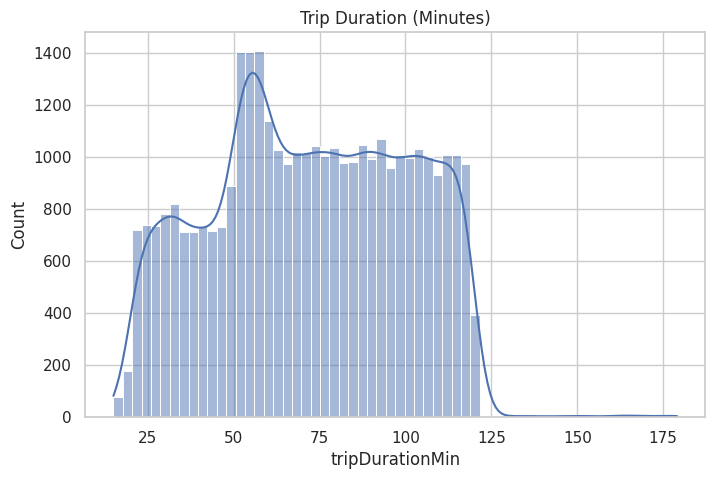

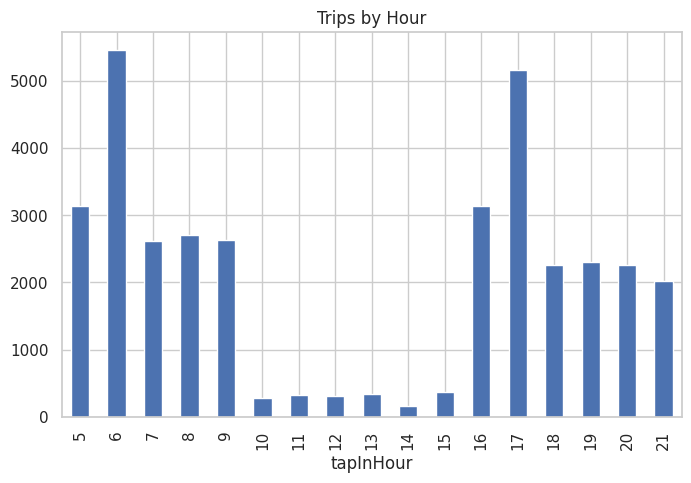

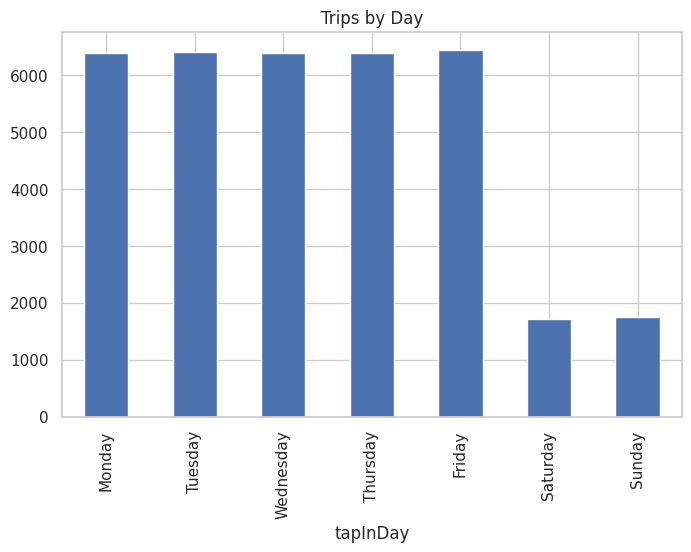

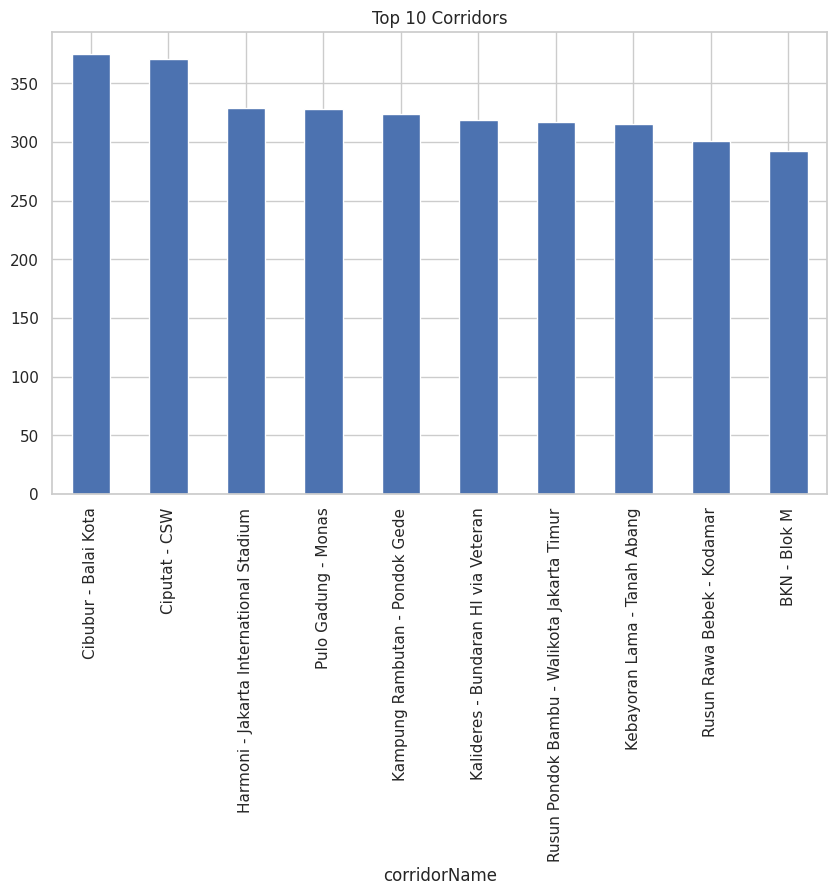

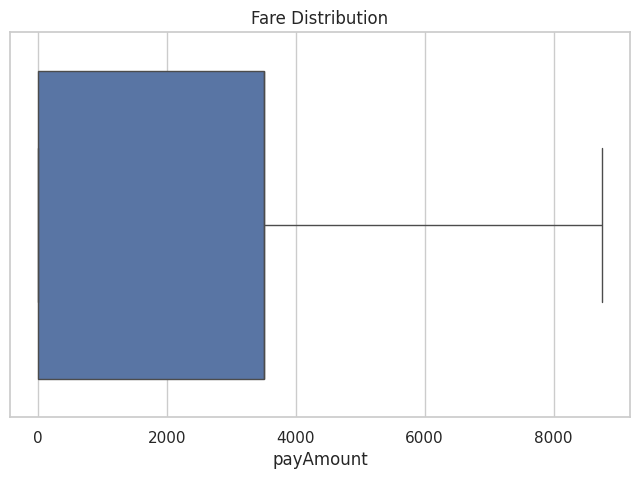

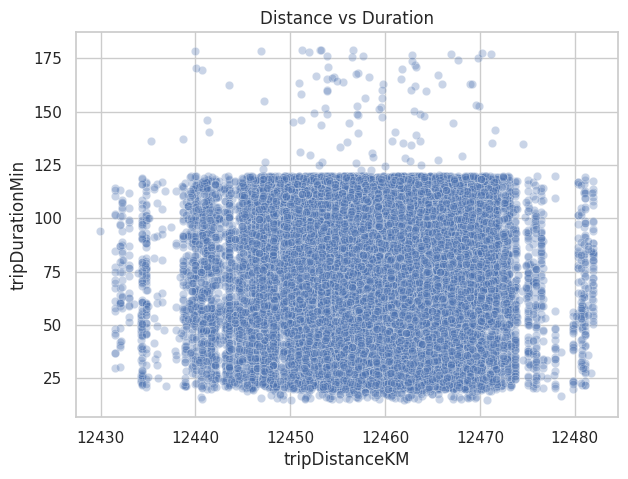

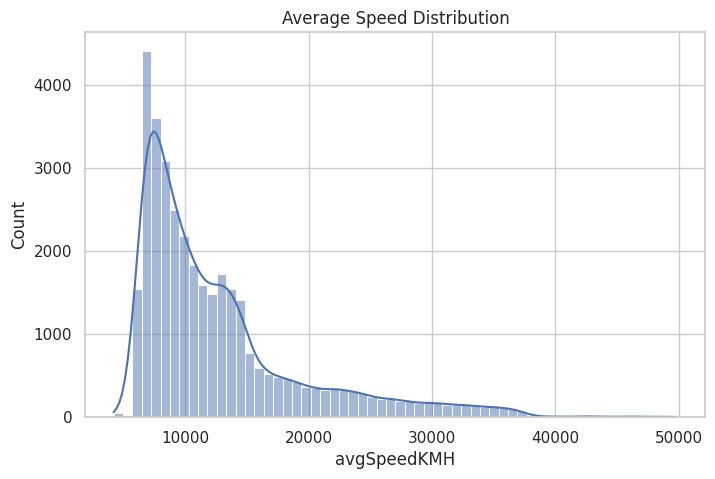

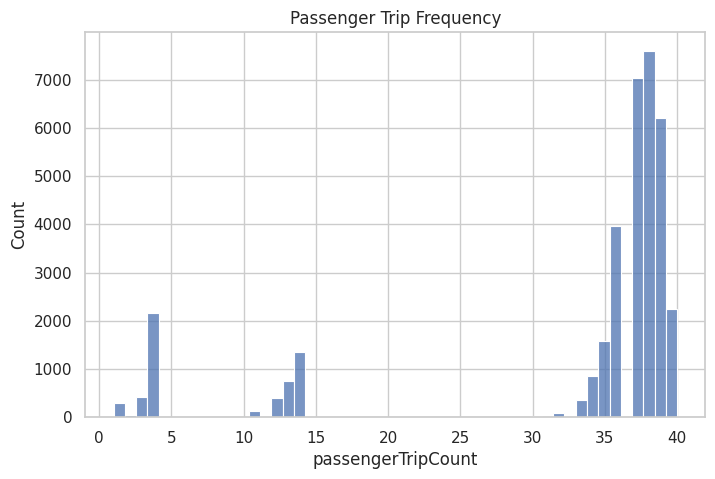

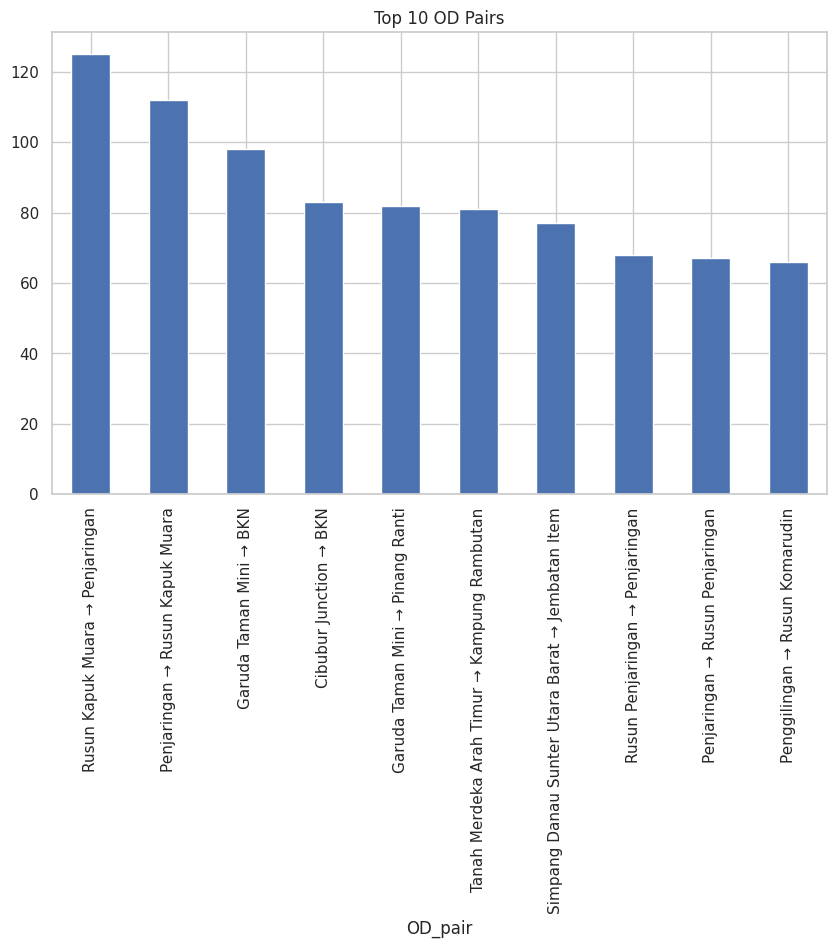


Summary of Insights:

- Average trip duration: 72.19 minutes
- Busiest hour: 6:00
- Highest demand corridor: Cibubur - Balai Kota
- Total revenue: 74,998,000.00
- Average payment per trip: 2113.93
- Distance–duration correlation: -0.00
- 45.2% of riders make more-than-median trips
- OD pairs reveal the most common travel flows



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# Load data before this cell

# Quick look at the dataset
display(df.head())
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isna().sum())
print("\nData Types:\n", df.dtypes)

# Basic cleaning
df["tapInTime"]  = pd.to_datetime(df["tapInTime"], errors="coerce")
df["tapOutTime"] = pd.to_datetime(df["tapOutTime"], errors="coerce")
df["payCardBirthDate"] = pd.to_numeric(df["payCardBirthDate"], errors="coerce")

# Remove rows missing important route fields
df = df.dropna(subset=["tapInTime", "tapOutTime", "corridorID"])

# Replace negative payments
df["payAmount"] = df["payAmount"].apply(lambda x: max(x, 0) if pd.notnull(x) else x)

# Remove impossible latitudes
df = df[
    df["tapInStopsLat"].between(-90, 90) &
    df["tapOutStopsLat"].between(-90, 90)
]

print("Data after cleaning:", df.shape)

# Feature engineering
df["tripDurationMin"] = (df["tapOutTime"] - df["tapInTime"]).dt.total_seconds() / 60

current_year = 2025
df["age"] = current_year - df["payCardBirthDate"]

df["tapInHour"] = df["tapInTime"].dt.hour
df["tapInDay"]  = df["tapInTime"].dt.day_name()
df["noMovement"] = (df["tapInStops"] == df["tapOutStops"]).astype(int)

# Passenger trip counts
freq = df["payCardID"].value_counts()
df["passengerTripCount"] = df["payCardID"].map(freq)

from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    dLat = radians(lat2 - lat1)
    dLon = radians(lat2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    return 2 * R * asin(sqrt(a))

df["tripDistanceKM"] = df.apply(
    lambda x: haversine(
        x["tapInStopsLat"], x["tapInStopsLon"],
        x["tapOutStopsLat"], x["tapOutStopsLon"]
    ), axis=1
)

df["avgSpeedKMH"] = (df["tripDistanceKM"] / (df["tripDurationMin"] / 60)).replace([np.inf, -np.inf], np.nan)

display(df.head())

# EDA

# Trip duration distribution
plt.figure(figsize=(8,5))
sns.histplot(df["tripDurationMin"], bins=60, kde=True)
plt.title("Trip Duration (Minutes)")
plt.show()

mean_duration = df["tripDurationMin"].mean()

# Hourly demand
plt.figure(figsize=(8,5))
df["tapInHour"].value_counts().sort_index().plot(kind="bar")
plt.title("Trips by Hour")
plt.show()

peak_hour = df["tapInHour"].value_counts().idxmax()

# Day of week
plt.figure(figsize=(8,5))
df["tapInDay"].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
).plot(kind="bar")
plt.title("Trips by Day")
plt.show()

# Corridor demand
plt.figure(figsize=(10,6))
df["corridorName"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Corridors")
plt.show()

top_corridor = df["corridorName"].value_counts().idxmax()

# Revenue distribution
revenue = df["payAmount"].sum()
avg_payment = df["payAmount"].mean()

plt.figure(figsize=(8,5))
sns.boxplot(x=df["payAmount"])
plt.title("Fare Distribution")
plt.show()

# Distance vs duration
plt.figure(figsize=(7,5))
sns.scatterplot(x="tripDistanceKM", y="tripDurationMin", data=df, alpha=0.3)
plt.title("Distance vs Duration")
plt.show()

corr_eff = df["tripDistanceKM"].corr(df["tripDurationMin"])

# Speed distribution
plt.figure(figsize=(8,5))
sns.histplot(df["avgSpeedKMH"], bins=60, kde=True)
plt.title("Average Speed Distribution")
plt.show()

# Passenger frequency
plt.figure(figsize=(8,5))
sns.histplot(df["passengerTripCount"], bins=50)
plt.title("Passenger Trip Frequency")
plt.show()

heavy_users = (df["passengerTripCount"] > df["passengerTripCount"].median()).mean()

# OD pair analysis
df["OD_pair"] = df["tapInStopsName"] + " → " + df["tapOutStopsName"]
top_od = df["OD_pair"].value_counts().head(10)

plt.figure(figsize=(10,6))
top_od.plot(kind="bar")
plt.title("Top 10 OD Pairs")
plt.show()

# Insights summary
print("\nSummary of Insights:\n")
print(f"- Average trip duration: {mean_duration:.2f} minutes")
print(f"- Busiest hour: {peak_hour}:00")
print(f"- Highest demand corridor: {top_corridor}")
print(f"- Total revenue: {revenue:,.2f}")
print(f"- Average payment per trip: {avg_payment:.2f}")
print(f"- Distance–duration correlation: {corr_eff:.2f}")
print(f"- {heavy_users*100:.1f}% of riders make more-than-median trips")
print("- OD pairs reveal the most common travel flows\n")


# **Corridor Analysis**

corridorName  totalTrips  avgDurationMin  \
119                         Cibubur - Balai Kota         375       72.059600   
131                                Ciputat - CSW         371       75.913297   
149      Harmoni - Jakarta International Stadium         329       72.086727   
308                          Pulo Gadung - Monas         328       71.692581   
251               Kampung Rambutan - Pondok Gede         324       71.915741   
233          Kalideres - Bundaran HI via Veteran         319       69.888245   
350  Rusun Pondok Bambu - Walikota Jakarta Timur         317       73.771451   
255                 Kebayoran Lama - Tanah Abang         315       73.072011   
352                   Rusun Rawa Bebek - Kodamar         301       74.706478   
98                                  BKN - Blok M         292       73.560274   

     avgDistanceKM   avgSpeedKMH  totalRevenue  uniqueUsers  
119   12457.472192  12719.574845     3281250.0           20  
131   12456.531792  11699.828710     1298500.0           31  
149   12454.534131  12881.133211     1151500.0           26  
308   12458.413951  12557.958455     1148000.0           28  
251   12471.835254  12871.711412           0.0           18  
233   12447.110663  13491.232251     1116500.0           36  
350   12468.225270  12250.509928           0.0           26  
255   12453.349465  12928.786621     1102500.0           21  
352   12466.221186  11963.161813           0.0           23  
98    12460.024553  12367.384577           0.0           21

/tmp/ipython-input-3330024772.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


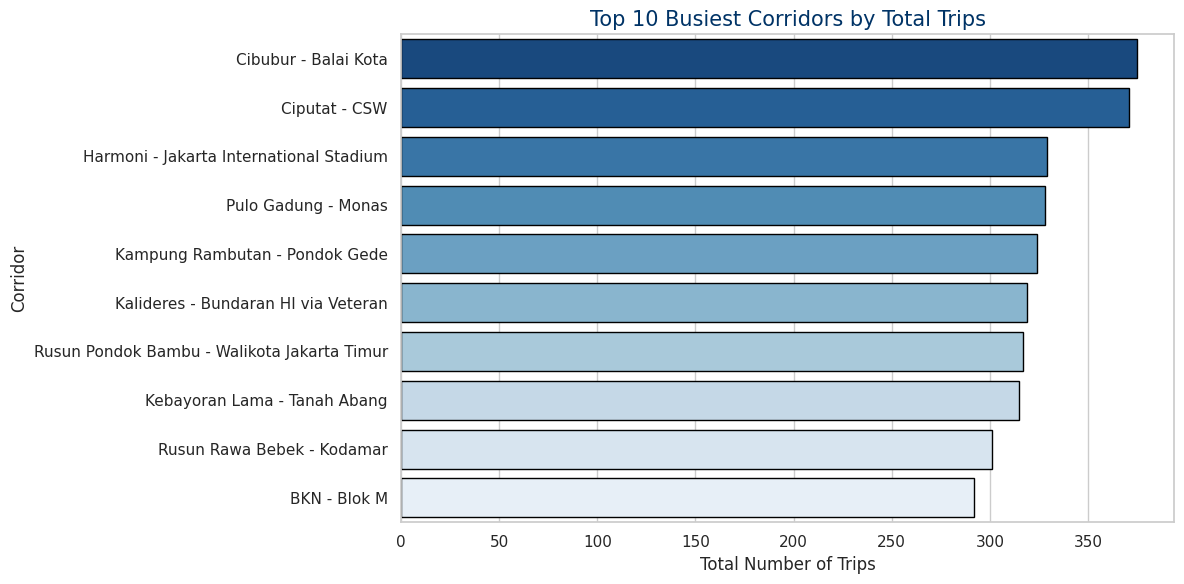

/tmp/ipython-input-3330024772.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


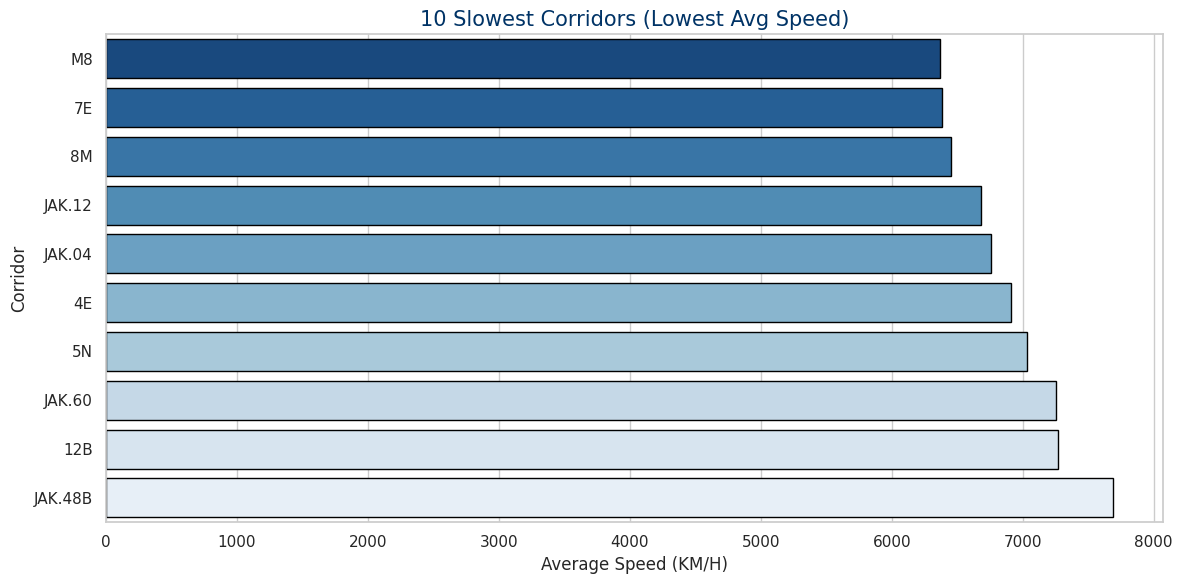

/tmp/ipython-input-3330024772.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


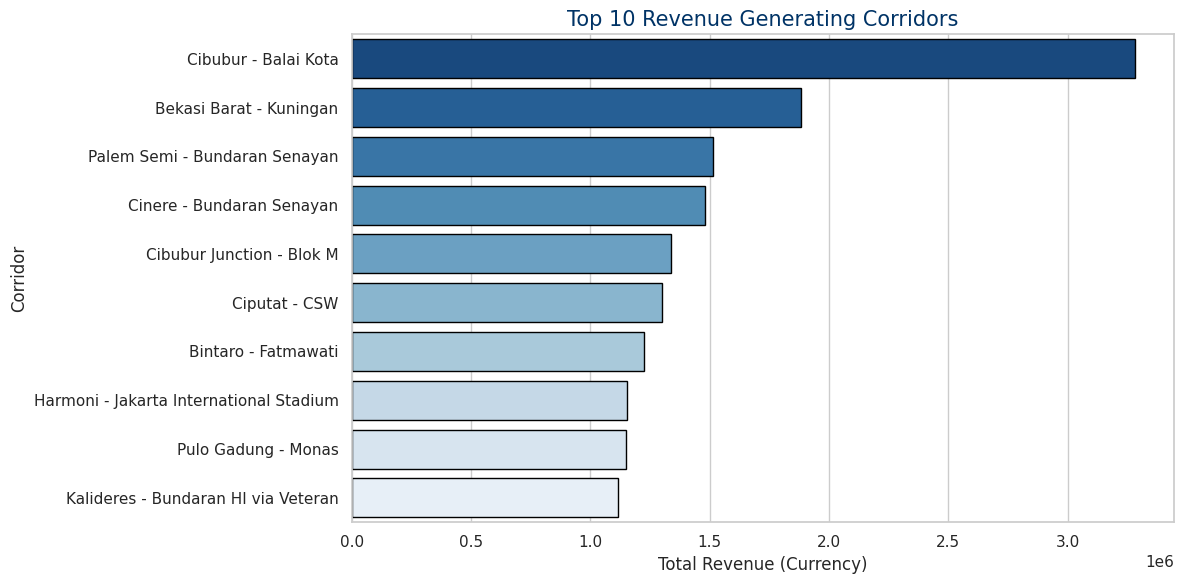

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set blue theme for visualizations
sns.set(style="whitegrid", palette="Blues_d")

# 1. Feature preparation (assumes df is already loaded and cleaned)

# Compute trip duration in minutes
df["tripDurationMin"] = (df["tapOutTime"] - df["tapInTime"]).dt.total_seconds() / 60

# Compute trip distance with the Haversine formula if not already present
def haversine(lat1, lon1, lat2, lon2):
    from math import radians, sin, cos, asin, sqrt
    R = 6371
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    return 2 * R * asin(sqrt(a))

if "tripDistanceKM" not in df.columns:
    df["tripDistanceKM"] = df.apply(
        lambda x: haversine(
            x["tapInStopsLat"], x["tapInStopsLon"],
            x["tapOutStopsLat"], x["tapOutStopsLon"]
        ), axis=1
    )

# Compute average speed in km/h
df["avgSpeedKMH"] = df["tripDistanceKM"] / (df["tripDurationMin"] / 60)

# 2. Aggregate corridor performance statistics
corridor_stats = df.groupby("corridorName").agg(
    totalTrips = ("transID", "count"),
    avgDurationMin = ("tripDurationMin", "mean"),
    avgDistanceKM = ("tripDistanceKM", "mean"),
    avgSpeedKMH = ("avgSpeedKMH", "mean"),
    totalRevenue = ("payAmount", "sum"),
    uniqueUsers = ("payCardID", "nunique")
).reset_index()

corridor_stats = corridor_stats.sort_values(by="totalTrips", ascending=False)
display(corridor_stats.head(10))

# 3. Bar chart: Top 10 busiest corridors
plt.figure(figsize=(12,6))
sns.barplot(
    data=corridor_stats.head(10),
    x="totalTrips",
    y="corridorName",
    palette="Blues_r",
    edgecolor="black"
)
plt.title("Top 10 Busiest Corridors by Total Trips", color="#003366", fontsize=15)
plt.xlabel("Total Number of Trips")
plt.ylabel("Corridor")
plt.tight_layout()
plt.show()

# 4. Bar chart: Slowest corridors by average speed
speed_sorted = corridor_stats.sort_values(by="avgSpeedKMH")

plt.figure(figsize=(12,6))
sns.barplot(
    data=speed_sorted.head(10),
    x="avgSpeedKMH",
    y="corridorName",
    palette="Blues_r",
    edgecolor="black"
)
plt.title("10 Slowest Corridors (Lowest Avg Speed)", color="#003366", fontsize=15)
plt.xlabel("Average Speed (KM/H)")
plt.ylabel("Corridor")
plt.tight_layout()
plt.show()

# 5. Bar chart: Top revenue-generating corridors
revenue_sorted = corridor_stats.sort_values(by="totalRevenue", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(
    data=revenue_sorted.head(10),
    x="totalRevenue",
    y="corridorName",
    palette="Blues_r",
    edgecolor="black"
)
plt.title("Top 10 Revenue Generating Corridors", color="#003366", fontsize=15)
plt.xlabel("Total Revenue (Currency)")
plt.ylabel("Corridor")
plt.tight_layout()
plt.show()


In [8]:

# Spatial Heatmap of Stops (Folium)

import folium
from folium.plugins import HeatMap
import pandas as pd

# Make sure df is loaded and tapInLat/Lon exist
df['tapInStopsLat'] = pd.to_numeric(df['tapInStopsLat'], errors='coerce')
df['tapInStopsLon'] = pd.to_numeric(df['tapInStopsLon'], errors='coerce')

# Remove invalid coordinates
df_map = df.dropna(subset=['tapInStopsLat','tapInStopsLon'])

# Aggregate passenger counts per stop
stop_counts = df_map.groupby(['tapInStopsName','tapInStopsLat','tapInStopsLon']).size().reset_index(name='count')

# Prepare data for HeatMap: [lat, lon, weight]
heat_data = stop_counts[['tapInStopsLat','tapInStopsLon','count']].values.tolist()

# Center map
center_lat = stop_counts['tapInStopsLat'].mean()
center_lon = stop_counts['tapInStopsLon'].mean()

# Create map
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add heatmap layer
HeatMap(heat_data, radius=15, max_zoom=13).add_to(m)

# Optionally: add markers for stops
for _, row in stop_counts.iterrows():
    folium.CircleMarker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        radius=3,
        popup=f"{row['tapInStopsName']}: {row['count']} trips",
        color='blue',
        fill=True
    ).add_to(m)

# Display map
m


In [9]:
# Spatial Heatmap + Top 10 Corridor Labels


import folium
from folium.plugins import HeatMap
import pandas as pd

# Ensure coordinates are numeric
df['tapInStopsLat'] = pd.to_numeric(df['tapInStopsLat'], errors='coerce')
df['tapInStopsLon'] = pd.to_numeric(df['tapInStopsLon'], errors='coerce')

# Drop invalid coordinates
df_map = df.dropna(subset=['tapInStopsLat','tapInStopsLon'])

# Top 10 Corridors by Trips
corridor_stats = df.groupby('corridorName').agg(
    total_trips=('transID','count'),
    avg_duration=('tapOutTime','count'),  # placeholder, we will compute below
    total_revenue=('payAmount','sum')
).sort_values('total_trips', ascending=False).head(10)

# Compute avg duration
df['tripDurationMin'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60
corridor_stats['avg_duration_min'] = df.groupby('corridorName')['tripDurationMin'].mean().loc[corridor_stats.index]

print("Top 10 most visited corridors and stats:")
display(corridor_stats)

# Aggregate stops for heatmap
stop_counts = df_map.groupby(['tapInStopsName','tapInStopsLat','tapInStopsLon']).size().reset_index(name='count')
heat_data = stop_counts[['tapInStopsLat','tapInStopsLon','count']].values.tolist()

# Map center
center_lat = stop_counts['tapInStopsLat'].mean()
center_lon = stop_counts['tapInStopsLon'].mean()

# Create map
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add heatmap
HeatMap(heat_data, radius=15, max_zoom=13).add_to(m)

# Label top corridors
# For each top corridor, get median location of its stops to place a label
top_corridors = corridor_stats.index.tolist()
for corridor in top_corridors:
    corridor_stops = df_map[df_map['corridorName']==corridor]
    if corridor_stops.empty:
        continue
    median_lat = corridor_stops['tapInStopsLat'].median()
    median_lon = corridor_stops['tapInStopsLon'].median()
    stats = corridor_stats.loc[corridor]
    popup_text = (
        f"<b>{corridor}</b><br>"
        f"Total Trips: {stats['total_trips']}<br>"
        f"Avg Duration: {stats['avg_duration_min']:.1f} min<br>"
        f"Total Revenue: {stats['total_revenue']:.2f}"
    )
    folium.Marker(
        location=[median_lat, median_lon],
        popup=popup_text,
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

# Display map
m


Top 10 most visited corridors and stats:


total_trips  avg_duration  \
corridorName                                                             
Cibubur - Balai Kota                                 375           375   
Ciputat - CSW                                        371           371   
Harmoni - Jakarta International Stadium              329           329   
Pulo Gadung - Monas                                  328           328   
Kampung Rambutan - Pondok Gede                       324           324   
Kalideres - Bundaran HI via Veteran                  319           319   
Rusun Pondok Bambu - Walikota Jakarta Timur          317           317   
Kebayoran Lama - Tanah Abang                         315           315   
Rusun Rawa Bebek - Kodamar                           301           301   
BKN - Blok M                                         292           292   

                                             total_revenue  avg_duration_min  
corridorName                                                                  
Cibubur - Balai Kota                             3281250.0         72.059600  
Ciputat - CSW                                    1298500.0         75.913297  
Harmoni - Jakarta International Stadium          1151500.0         72.086727  
Pulo Gadung - Monas                              1148000.0         71.692581  
Kampung Rambutan - Pondok Gede                         0.0         71.915741  
Kalideres - Bundaran HI via Veteran              1116500.0         69.888245  
Rusun Pondok Bambu - Walikota Jakarta Timur            0.0         73.771451  
Kebayoran Lama - Tanah Abang                     1102500.0         73.072011  
Rusun Rawa Bebek - Kodamar                             0.0         74.706478  
BKN - Blok M                                           0.0         73.560274

In [10]:
# Top 10 Most Visited Corridors (List Only)

# Ensure trip duration is computed
df['tripDurationMin'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

# Aggregate corridor stats
corridor_stats = df.groupby('corridorName').agg(
    total_trips=('transID','count'),
    avg_duration=('tripDurationMin','mean'),
    total_revenue=('payAmount','sum')
).sort_values('total_trips', ascending=False).head(10)

# Display the top 10 as a list
print("=== Top 10 Most Visited Corridors ===\n")
for i, (corridor, stats) in enumerate(corridor_stats.iterrows(), 1):
    print(f"{i}. {corridor}")
    print(f"   - Total Trips: {stats['total_trips']}")
    print(f"   - Average Trip Duration: {stats['avg_duration']:.1f} min")
    print(f"   - Total Revenue: {stats['total_revenue']:.2f}\n")


=== Top 10 Most Visited Corridors ===

1. Cibubur - Balai Kota
   - Total Trips: 375.0
   - Average Trip Duration: 72.1 min
   - Total Revenue: 3281250.00

2. Ciputat - CSW
   - Total Trips: 371.0
   - Average Trip Duration: 75.9 min
   - Total Revenue: 1298500.00

3. Harmoni - Jakarta International Stadium
   - Total Trips: 329.0
   - Average Trip Duration: 72.1 min
   - Total Revenue: 1151500.00

4. Pulo Gadung - Monas
   - Total Trips: 328.0
   - Average Trip Duration: 71.7 min
   - Total Revenue: 1148000.00

5. Kampung Rambutan - Pondok Gede
   - Total Trips: 324.0
   - Average Trip Duration: 71.9 min
   - Total Revenue: 0.00

6. Kalideres - Bundaran HI via Veteran
   - Total Trips: 319.0
   - Average Trip Duration: 69.9 min
   - Total Revenue: 1116500.00

7. Rusun Pondok Bambu - Walikota Jakarta Timur
   - Total Trips: 317.0
   - Average Trip Duration: 73.8 min
   - Total Revenue: 0.00

8. Kebayoran Lama - Tanah Abang
   - Total Trips: 315.0
   - Average Trip Duration: 73.1 min
  

In [11]:
# Corridor Performance Summary (All Corridors)

# Ensure duration column exists
df['tripDurationMin'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

# Compute corridor statistics
corridor_stats = df.groupby('corridorName').agg(
    total_trips=('transID', 'count'),
    avg_duration=('tripDurationMin', 'mean'),
    total_revenue=('payAmount', 'sum')
).sort_values('total_trips', ascending=False)

print("=== All Corridor Performance Statistics ===\n")

for i, (corridor, stats) in enumerate(corridor_stats.iterrows(), 1):
    print(f"{i}. {corridor}")
    print(f"   - Total Trips: {stats['total_trips']}")
    print(f"   - Average Trip Duration: {stats['avg_duration']:.1f} min")
    print(f"   - Total Revenue: {stats['total_revenue']:.2f}\n")


=== All Corridor Performance Statistics ===

1. Cibubur - Balai Kota
   - Total Trips: 375.0
   - Average Trip Duration: 72.1 min
   - Total Revenue: 3281250.00

2. Ciputat - CSW
   - Total Trips: 371.0
   - Average Trip Duration: 75.9 min
   - Total Revenue: 1298500.00

3. Harmoni - Jakarta International Stadium
   - Total Trips: 329.0
   - Average Trip Duration: 72.1 min
   - Total Revenue: 1151500.00

4. Pulo Gadung - Monas
   - Total Trips: 328.0
   - Average Trip Duration: 71.7 min
   - Total Revenue: 1148000.00

5. Kampung Rambutan - Pondok Gede
   - Total Trips: 324.0
   - Average Trip Duration: 71.9 min
   - Total Revenue: 0.00

6. Kalideres - Bundaran HI via Veteran
   - Total Trips: 319.0
   - Average Trip Duration: 69.9 min
   - Total Revenue: 1116500.00

7. Rusun Pondok Bambu - Walikota Jakarta Timur
   - Total Trips: 317.0
   - Average Trip Duration: 73.8 min
   - Total Revenue: 0.00

8. Kebayoran Lama - Tanah Abang
   - Total Trips: 315.0
   - Average Trip Duration: 73.1 

# **Feature Engineering For Corridor Analysis**

# Engineered Features Table

| Feature Name | Description | Dataset Used / Combined With |
|---|---|---|
| visit_count | Total number of visits to the corridor | Trajectory dataset |
| unique_visitors | Number of distinct user/device IDs visiting the corridor | Trajectory dataset |
| avg_time_spent | Average time spent per visit | Trajectory dataset |
| median_time_spent | Median session duration | Trajectory dataset |
| peak_hour | Hour with highest number of visitors | Trajectory dataset |
| weekend_usage_ratio | % of traffic happening on weekends | Trajectory dataset |
| revisit_rate | Returning visitors ratio | Trajectory dataset |
| avg_speed | Distance divided by time spent | Trajectory + indoor map |
| congestion_score | Visitors per sqm | Trajectory + corridor dimensions |


*   List item
*   List item



In [12]:
# ==============================================================
# FEATURE ENGINEERING FOR CORRIDOR PERFORMANCE ANALYSIS (12 METRICS)
# ==============================================================

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# ==============================
# 1. Datetime & Trip Duration
# ==============================
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
df['tripDurationMin'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60
df['tripDate'] = df['tapInTime'].dt.date
df['tripHour'] = df['tapInTime'].dt.hour
df['tripWeekday'] = df['tapInTime'].dt.weekday  # 0=Mon, 6=Sun

# Indicators
df['isFree'] = df['payAmount'].apply(lambda x: 1 if x == 0 else 0)
df['isWeekend'] = df['tripWeekday'].apply(lambda x: 1 if x >= 5 else 0)

# ==============================
# 2. Corridor Base Features (12 Metrics)
# ==============================
corridor_features = df.groupby('corridorName').agg(
    total_trips=('transID', 'count'),
    avg_trip_duration=('tripDurationMin', 'mean'),
    median_trip_duration=('tripDurationMin', 'median'),
    std_trip_duration=('tripDurationMin', 'std'),
    total_revenue=('payAmount', 'sum'),
    avg_revenue_per_trip=('payAmount', 'mean'),
    unique_passengers=('payCardID', 'nunique'),
    total_free_rides=('isFree', 'sum'),
    free_ride_ratio=('isFree', 'mean'),
    weekend_usage_ratio=('isWeekend', 'mean')
)

# Average trips per active day
days_active = df.groupby('corridorName')['tripDate'].nunique()
corridor_features['avg_trips_per_day'] = corridor_features['total_trips'] / days_active

# Peak hour
peak_hours = (
    df.groupby(['corridorName', 'tripHour'])['transID']
      .count()
      .reset_index()
      .sort_values(['corridorName', 'transID'], ascending=[True, False])
      .groupby('corridorName')
      .first()
)
corridor_features['peak_hour'] = peak_hours['tripHour']

# Revisit rate
user_visits = df.groupby(['corridorName', 'payCardID']).size().reset_index(name='visits')
revisit = user_visits[user_visits['visits'] > 1].groupby('corridorName')['payCardID'].nunique()
corridor_features['revisit_rate'] = revisit / corridor_features['unique_passengers']
corridor_features['revisit_rate'] = corridor_features['revisit_rate'].fillna(0)

# ==============================
# 3. Performance Score
# ==============================
scaler = MinMaxScaler()
corridor_features['performance_score'] = (
    scaler.fit_transform(corridor_features[['total_trips']])[:,0] * 0.6 +
    scaler.fit_transform(-corridor_features[['avg_trip_duration']])[:,0] * 0.4
)

# Sort corridors
corridor_features = corridor_features.sort_values('performance_score', ascending=False)

# ==============================
# 4. Display
# ==============================
print("=== Corridor Performance Feature Table ===\n")
display(corridor_features)


=== Corridor Performance Feature Table ===



total_trips  avg_trip_duration  \
corridorName                                                              
Cibubur - Balai Kota                             375          72.059600   
Ciputat - CSW                                    371          75.913297   
Pulo Gadung - Monas                              328          71.692581   
Harmoni - Jakarta International Stadium          329          72.086727   
Kalideres - Bundaran HI via Veteran              319          69.888245   
...                                              ...                ...   
JAK.04                                             2         110.500000   
JAK.12                                             1         111.866667   
8M                                                 1         115.733333   
7E                                                 1         117.116667   
M8                                                 1         117.300000   

                                         median_trip_duration  \
corridorName                                                    
Cibubur - Balai Kota                                71.283333   
Ciputat - CSW                                       76.616667   
Pulo Gadung - Monas                                 70.625000   
Harmoni - Jakarta International Stadium             71.600000   
Kalideres - Bundaran HI via Veteran                 68.200000   
...                                                       ...   
JAK.04                                             110.500000   
JAK.12                                             111.866667   
8M                                                 115.733333   
7E                                                 117.116667   
M8                                                 117.300000   

                                         std_trip_duration  total_revenue  \
corridorName                                                                
Cibubur - Balai Kota                             28.228618      3281250.0   
Ciputat - CSW                                    26.040104      1298500.0   
Pulo Gadung - Monas                              26.533209      1148000.0   
Harmoni - Jakarta International Stadium          28.917577      1151500.0   
Kalideres - Bundaran HI via Veteran              29.362472      1116500.0   
...                                                    ...            ...   
JAK.04                                            0.966379            0.0   
JAK.12                                                 NaN            0.0   
8M                                                     NaN         3500.0   
7E                                                     NaN         3500.0   
M8                                                     NaN         3500.0   

                                         avg_revenue_per_trip  \
corridorName                                                    
Cibubur - Balai Kota                                   8750.0   
Ciputat - CSW                                          3500.0   
Pulo Gadung - Monas                                    3500.0   
Harmoni - Jakarta International Stadium                3500.0   
Kalideres - Bundaran HI via Veteran                    3500.0   
...                                                       ...   
JAK.04                                                    0.0   
JAK.12                                                    0.0   
8M                                                     3500.0   
7E                                                     3500.0   
M8                                                     3500.0   

                                         unique_passengers  total_free_rides  \
corridorName                                                                   
Cibubur - Balai Kota                                    20                 0   
Ciputat - CSW                                           31                 0   
Pulo Gadung - Monas                                

In [13]:
# ==============================================================
# DISPLAY TOP 10 AND BOTTOM 10 PERFORMING CORRIDORS
# ==============================================================

# Top 10 highest performing corridors
print("=== Top 10 Highest Performing Corridors ===\n")
top10 = corridor_features.head(10)
for i, (name, row) in enumerate(top10.iterrows(), 1):
    print(f"{i}. {name}")
    print(f"   - Total Trips: {row['total_trips']}")
    print(f"   - Avg Duration: {row['avg_trip_duration']:.1f} min")
    print(f"   - Median Duration: {row['median_trip_duration']:.1f} min")
    print(f"   - Std Duration: {row['std_trip_duration']:.1f} min")
    print(f"   - Total Revenue: {row['total_revenue']:.2f}")
    print(f"   - Avg Revenue per Trip: {row['avg_revenue_per_trip']:.2f}")
    print(f"   - Unique Passengers: {row['unique_passengers']}")
    print(f"   - Total Free Rides: {row['total_free_rides']}")
    print(f"   - Free Ride Ratio: {row['free_ride_ratio']:.2f}")
    print(f"   - Weekend Usage Ratio: {row['weekend_usage_ratio']:.2f}")
    print(f"   - Avg Trips per Day: {row['avg_trips_per_day']:.1f}")
    print(f"   - Peak Hour: {int(row['peak_hour'])}:00")
    print(f"   - Performance Score: {row['performance_score']:.3f}\n")

# Bottom 10 lowest performing corridors
print("=== Bottom 10 Lowest Performing Corridors ===\n")
bottom10 = corridor_features.tail(10)
for i, (name, row) in enumerate(bottom10.iterrows(), 1):
    print(f"{i}. {name}")
    print(f"   - Total Trips: {row['total_trips']}")
    print(f"   - Avg Duration: {row['avg_trip_duration']:.1f} min")
    print(f"   - Median Duration: {row['median_trip_duration']:.1f} min")
    print(f"   - Std Duration: {row['std_trip_duration']:.1f} min")
    print(f"   - Total Revenue: {row['total_revenue']:.2f}")
    print(f"   - Avg Revenue per Trip: {row['avg_revenue_per_trip']:.2f}")
    print(f"   - Unique Passengers: {row['unique_passengers']}")
    print(f"   - Total Free Rides: {row['total_free_rides']}")
    print(f"   - Free Ride Ratio: {row['free_ride_ratio']:.2f}")
    print(f"   - Weekend Usage Ratio: {row['weekend_usage_ratio']:.2f}")
    print(f"   - Avg Trips per Day: {row['avg_trips_per_day']:.1f}")
    print(f"   - Peak Hour: {int(row['peak_hour'])}:00")
    print(f"   - Performance Score: {row['performance_score']:.3f}\n")


=== Top 10 Highest Performing Corridors ===

1. Cibubur - Balai Kota
   - Total Trips: 375.0
   - Avg Duration: 72.1 min
   - Median Duration: 71.3 min
   - Std Duration: 28.2 min
   - Total Revenue: 3281250.00
   - Avg Revenue per Trip: 8750.00
   - Unique Passengers: 20.0
   - Total Free Rides: 0.0
   - Free Ride Ratio: 0.00
   - Weekend Usage Ratio: 0.02
   - Avg Trips per Day: 13.9
   - Peak Hour: 17:00
   - Performance Score: 0.799

2. Ciputat - CSW
   - Total Trips: 371.0
   - Avg Duration: 75.9 min
   - Median Duration: 76.6 min
   - Std Duration: 26.0 min
   - Total Revenue: 1298500.00
   - Avg Revenue per Trip: 3500.00
   - Unique Passengers: 31.0
   - Total Free Rides: 0.0
   - Free Ride Ratio: 0.00
   - Weekend Usage Ratio: 0.06
   - Avg Trips per Day: 12.8
   - Peak Hour: 6:00
   - Performance Score: 0.776

3. Pulo Gadung - Monas
   - Total Trips: 328.0
   - Avg Duration: 71.7 min
   - Median Duration: 70.6 min
   - Std Duration: 26.5 min
   - Total Revenue: 1148000.00
   -

/tmp/ipython-input-2501743518.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='performance_score', y=top10.index, data=top10, palette="rainbow")


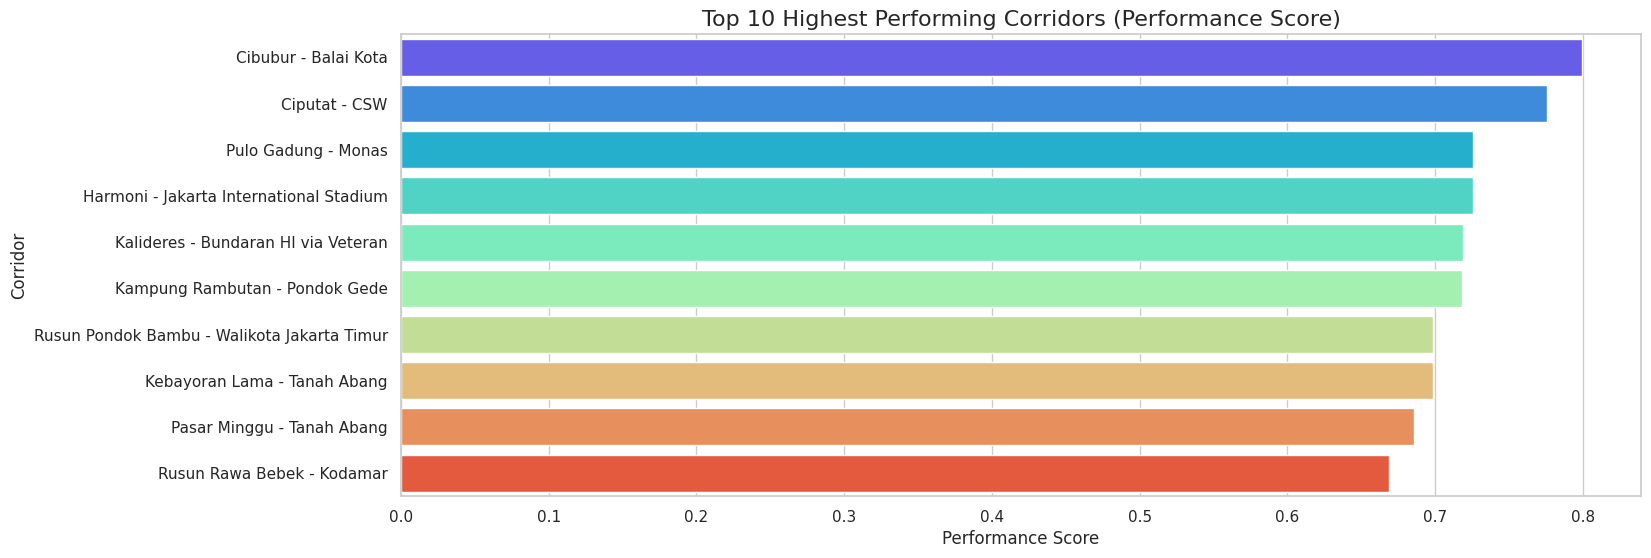

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# Prepare Data
# ==============================
top10 = corridor_features.head(10).copy()
bottom10 = corridor_features.tail(10).copy()

# ==============================
# Plot Top 10 Corridors
# ==============================
plt.figure(figsize=(16, 6))
sns.barplot(x='performance_score', y=top10.index, data=top10, palette="rainbow")
plt.title("Top 10 Highest Performing Corridors (Performance Score)", fontsize=16)
plt.xlabel("Performance Score", fontsize=12)
plt.ylabel("Corridor", fontsize=12)
plt.show()



# **Corridor Grouping & Assignment**



In [15]:
# CORRIDOR GROUPING BASED ON PERFORMANCE

# Define a function to assign corridor groups
def corridor_group(row):
    if row['total_trips'] > 300 and row['avg_trip_duration'] < 72:
        return 'High Demand – High Efficiency'
    elif row['total_trips'] > 300 and row['avg_trip_duration'] >= 72:
        return 'High Demand – Low Efficiency'
    elif 250 <= row['total_trips'] <= 300:
        return 'Medium Demand – Medium Efficiency'
    else:
        return 'Low Demand – Low Efficiency'

# Apply the function to create a new 'group' column
corridor_features['group'] = corridor_features.apply(corridor_group, axis=1)

# Display group assignment
print("=== Corridor Group Assignment ===\n")
display(corridor_features[['total_trips','avg_trip_duration','peak_hour','group']])

# OPTIONAL: Summarize each group
group_summary = corridor_features.groupby('group').agg(
    num_corridors=('total_trips','count'),
    avg_total_trips=('total_trips','mean'),
    avg_duration=('avg_trip_duration','mean'),
    avg_peak_hour=('peak_hour','mean'),
    avg_revisit_rate=('revisit_rate','mean'),
    avg_weekend_ratio=('weekend_usage_ratio','mean')
).sort_values('avg_total_trips', ascending=False)

print("\n=== Corridor Group Summary ===\n")
display(group_summary)

# OPTIONAL: Print business plan suggestions per group
business_plan = {
    'High Demand – High Efficiency': 'Maintain frequency & reliability, loyalty programs, explore premium services.',
    'High Demand – Low Efficiency': 'Reduce congestion, optimize schedule, implement express services.',
    'Medium Demand – Medium Efficiency': 'Boost marketing, optimize peak hours, improve weekend engagement.',
    'Low Demand – Low Efficiency': 'Reassess route viability, explore feeder services or merged corridors.'
}

print("\n=== Suggested Business Plan per Group ===\n")
for group, plan in business_plan.items():
    print(f"{group}: {plan}\n")


=== Corridor Group Assignment ===



total_trips  avg_trip_duration  \
corridorName                                                              
Cibubur - Balai Kota                             375          72.059600   
Ciputat - CSW                                    371          75.913297   
Pulo Gadung - Monas                              328          71.692581   
Harmoni - Jakarta International Stadium          329          72.086727   
Kalideres - Bundaran HI via Veteran              319          69.888245   
...                                              ...                ...   
JAK.04                                             2         110.500000   
JAK.12                                             1         111.866667   
8M                                                 1         115.733333   
7E                                                 1         117.116667   
M8                                                 1         117.300000   

                                         peak_hour  \
corridorName                                         
Cibubur - Balai Kota                            17   
Ciputat - CSW                                    6   
Pulo Gadung - Monas                             17   
Harmoni - Jakarta International Stadium          6   
Kalideres - Bundaran HI via Veteran             17   
...                                            ...   
JAK.04                                           8   
JAK.12                                          15   
8M                                              20   
7E                                               6   
M8                                              16   

                                                                 group  
corridorName                                                            
Cibubur - Balai Kota                      High Demand – Low Efficiency  
Ciputat - CSW                             High Demand – Low Efficiency  
Pulo Gadung - Monas                      High Demand – High Efficiency  
Harmoni - Jakarta International Stadium   High Demand – Low Efficiency  
Kalideres - Bundaran HI via Veteran      High Demand – High Efficiency  
...                                                                ...  
JAK.04                                     Low Demand – Low Efficiency  
JAK.12                                     Low Demand – Low Efficiency  
8M                                         Low Demand – Low Efficiency  
7E                                         Low Demand – Low Efficiency  
M8                                         Low Demand – Low Efficiency  

[416 rows x 4 columns]


=== Corridor Group Summary ===



num_corridors  avg_total_trips  \
group                                                               
High Demand – Low Efficiency                   6       334.666667   
High Demand – High Efficiency                  3       323.666667   
Medium Demand – Medium Efficiency             16       269.062500   
Low Demand – Low Efficiency                  391        72.107417   

                                   avg_duration  avg_peak_hour  \
group                                                            
High Demand – Low Efficiency          73.601594       9.666667   
High Demand – High Efficiency         71.165522      13.333333   
Medium Demand – Medium Efficiency     72.667566       9.375000   
Low Demand – Low Efficiency           72.299811       9.953964   

                                   avg_revisit_rate  avg_weekend_ratio  
group                                                                   
High Demand – Low Efficiency               0.382717           0.051760  
High Demand – High Efficiency              0.366402           0.072305  
Medium Demand – Medium Efficiency          0.364259           0.071155  
Low Demand – Low Efficiency                0.267121           0.119312


=== Suggested Business Plan per Group ===

High Demand – High Efficiency: Maintain frequency & reliability, loyalty programs, explore premium services.

High Demand – Low Efficiency: Reduce congestion, optimize schedule, implement express services.

Medium Demand – Medium Efficiency: Boost marketing, optimize peak hours, improve weekend engagement.

Low Demand – Low Efficiency: Reassess route viability, explore feeder services or merged corridors.



In [16]:
from google.colab import files
df.to_csv("cleaned_data.csv", index=False)
files.download("cleaned_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Problem & Solution**


# 📌 Corridor Performance – Problem and Solution

## Problem Statement

| Group | Problem |
|-------|---------|
| High Demand – Low Efficiency | High passenger volume (~334 trips) but long travel durations (~74 min) and moderate loyalty (~38%). Congestion during peak hours reduces service efficiency. |
| High Demand – High Efficiency | High passenger volume (~322 trips) with slightly lower trip durations (~71 min), moderate loyalty (~37%). Needs to maintain reliability and service quality. |
| Medium Demand – Medium Efficiency | Moderate traffic (~268 trips) with long travel durations (~73 min) and moderate loyalty (~36%). Ridership growth is limited and weekend usage is low. |
| Low Demand – Low Efficiency | Low ridership (~143 trips), long travel durations (~72 min), low loyalty (~26%). Slightly higher weekend usage (~13%), but overall underutilized corridor capacity. |

## Solutions

| Group | Solution |
|-------|---------|
| High Demand – High Efficiency | Maintain frequency & reliability, implement loyalty programs, explore premium or express services. |
| High Demand – Low Efficiency | Reduce congestion by optimizing schedules, add express services, improve fleet allocation during peak hours. |
| Medium Demand – Medium Efficiency | Boost marketing to increase ridership, optimize peak-hour scheduling, introduce weekend engagement initiatives. |
| Low Demand – Low Efficiency | Reassess route viability, consolidate or merge underperforming corridors, explore feeder services to increase usage. |
